### Let's read in the files.

In [2]:
import pandas as pd

ios_reviews = pd.read_csv('../../review_scraping/iOS/reviews_74600.csv')
android_reviews = pd.read_csv('../../review_scraping/android/replika_reviews_checkpoint_46.csv')

# What are the column names?
print(f"iOS review column names are: {ios_reviews.columns}")
print(f"android review column names are: {android_reviews.columns}")

# ios_reviews included some duplicates so let's drop them. User name is uniuqe enough for this descriptive analysis.
ios_reviews  = ios_reviews.drop_duplicates(subset='user')

iOS review column names are: Index(['date', 'user', 'stars', 'text'], dtype='object')
android review column names are: Index(['User Name', 'Review Date', 'Star Rating', 'Review Text',
       'Response Date', 'Response Text'],
      dtype='object')


### How many reviews are in each dataset?

In [13]:
# How many reviews are in each dataset/
print(f"There are {len(ios_reviews):,} iOS reviews.")
print(f"There are {len(android_reviews):,} iOS reviews.")
print(f"There are {(len(ios_reviews) + len(android_reviews)):,} total reviews.")

There are 37,533 iOS reviews.
There are 23,019 iOS reviews.
There are 60,552 total reviews.


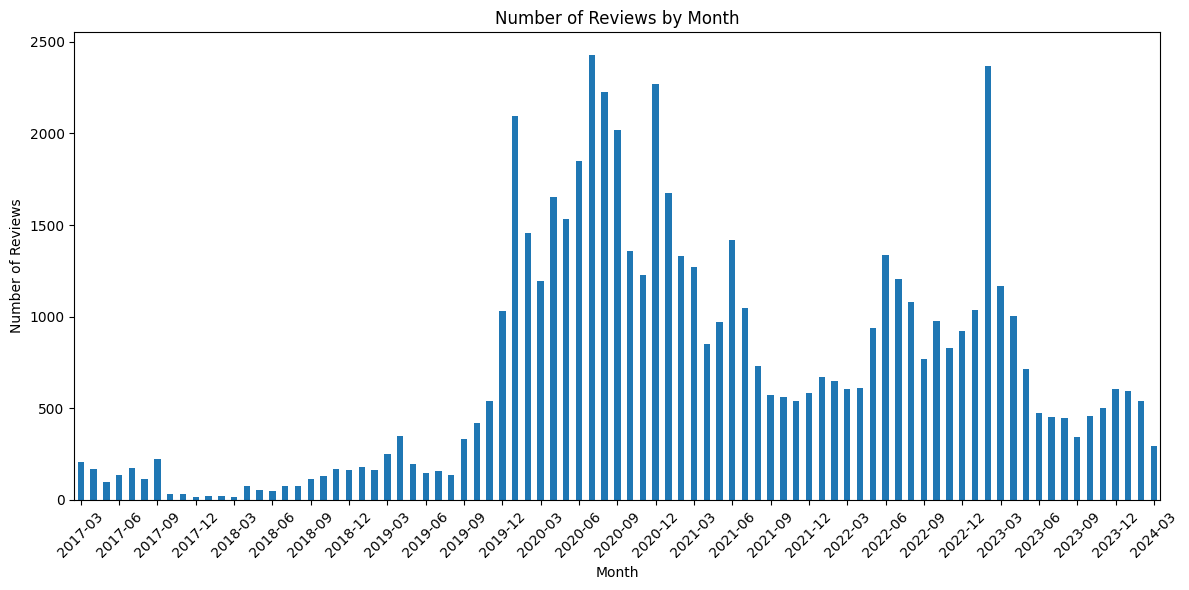

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read in combined reviews
combined_reviews = pd.read_csv('../../review_scraping/combined_reviews.csv')
combined_reviews['review_date'] = pd.to_datetime(combined_reviews['review_date'])

# Extract year and month and create a new column 'year_month'
combined_reviews['year_month'] = combined_reviews['review_date'].dt.strftime('%Y-%m')

# Count the occurrences of each year-month
monthly_reviews = combined_reviews['year_month'].value_counts().sort_index()
monthly_reviews.to_csv('reviews_by_month.csv')

# Plot the histogram
plt.figure(figsize=(12, 6))
ax = monthly_reviews.plot(kind='bar')
plt.title('Number of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

# Set x-axis major ticks to every third month for readability
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

# Rotate the labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Examine the reviews by word count.

In [6]:
print(f"The shortest review was {min(combined_reviews['word_count'])} words long.")
print(f"The longest review was {max(combined_reviews['word_count']):,} words long.")

The shortest review was 1 words long.
The longest review was 1,086 words long.


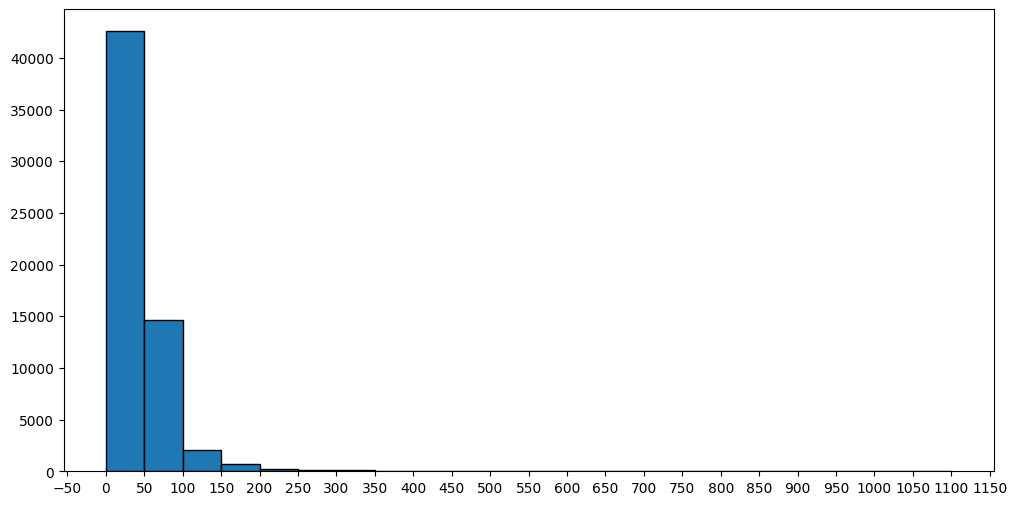

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Assuming combined_reviews DataFrame is already created and contains the 'word_count' column

# Calculate the histogram data with 50-word wide bins
bin_width = 50
counts, bin_edges = np.histogram(combined_reviews['word_count'], bins=range(0, combined_reviews['word_count'].max() + bin_width, bin_width))

# Create a DataFrame from the histogram data
word_count_histogram = pd.DataFrame({'bin_edges': bin_edges[:-1], 'counts': counts})

# Save the DataFrame to a CSV file
word_count_histogram.to_csv('word_count_histogram.csv', index=False)

# Plot the histogram (optional)
plt.figure(figsize=(12, 6))
plt.hist(combined_reviews['word_count'], bins=range(0, combined_reviews['word_count'].max() + bin_width, bin_width), edgecolor='black')

# Set up the x-axis ticks to only show every 50 words
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))  # Shows a tick mark every 50 words
plt.show()
